<h1 align="center">Perceptron</h1>

## Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Utility Functions

In [44]:
def linear(x):
    return x

def step(x):
  return np.where(x>=0, 1, 0)

def rectified_linear(x: np.ndarray):
    return np.maximum(0, x)


def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

## The Perceptron Algorithm

In [51]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, act=step):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = act

        self.weights = None
        self.bias = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.random.rand(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                y_predicted = self.predict(x_i)

                # Update weights and bias using delta rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X: np.ndarray) -> np.ndarray:
        net = np.dot(X, self.weights) + self.bias
        return self.activation_func(net)

## Products Prediction

### Initial and clean data

In [ ]:
prod_train = pd.read_csv("data/prod-train.csv")

In [ ]:
type_mappings = {"Chair": 0, "Table": 1, "Bed": 2}

In [ ]:
# Feature selection
features = ["Width", "Height"]

# Slipt data into X and Y
X = prod_train[features].values
Y = prod_train["Type"].map(type_mappings).values

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=69
)

### Training the Model

lr=0.01: mse=0.0
lr=0.02: mse=0.0
lr=0.001: mse=0.0
lr=0.002: mse=0.0


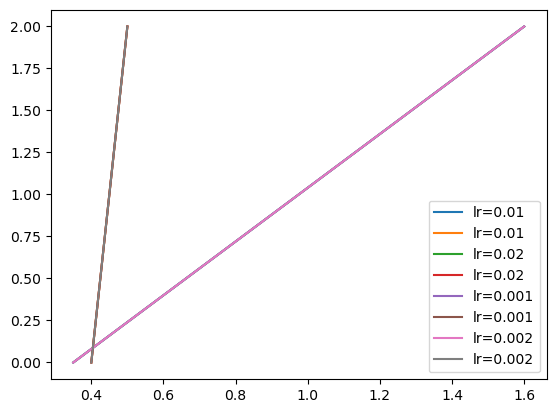

In [ ]:
for lr in [0.01, 0.02, 0.001, 0.002]:
    p = Perceptron(learning_rate=lr, n_iters=1000, act=rectified_linear)
    p.fit(X_train, y_train)

    y_pred = np.round(p.predict(X_test))

    print(f"lr={lr}: mse={mean_squared_error(y_test, y_pred)}")
    plt.plot(X_test, y_pred, label=f"lr={lr}")

plt.legend()
plt.show()

### Testing the Model

In [ ]:
p = Perceptron(learning_rate=0.01, n_iters=1000, act=rectified_linear)

In [ ]:
p.fit(X_train, y_train)

In [ ]:
prod_test = pd.read_csv("data/prod-test.csv")

In [ ]:
y_pred = np.round(p.predict(prod_test.values))

pd.DataFrame(
    {"Width": prod_test["Width"], "Height": prod_test["Height"], "Type": y_pred}
).replace({v: k for k, v in type_mappings.items()})

,Width,Height,Type
0,0.35,0.35,Chair
1,0.85,0.70,Table
2,1.40,0.45,Bed


## And Gate Prediction

In [58]:
p = Perceptron(learning_rate=0.01, n_iters=1000,act=step)

In [59]:
data = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

In [60]:
ag = pd.DataFrame(data, columns=['B', 'A', 'Y'])

In [61]:
p.fit(ag[["B", "A"]].values, ag["Y"].values)

In [62]:
y_pred = np.round(p.predict(ag[["B", "A"]].values))

In [64]:
pd.DataFrame({"A": ag["A"], "B": ag["B"], "Y_target": ag["Y"], "Y_pred": y_pred})

,A,B,Y_target,Y_pred
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,1,1,1
